In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

print("Veri yüklendi!")
print("Eğitim seti boyutu:", train_data.shape)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Veri yüklendi!
Eğitim seti boyutu: (42000, 785)
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

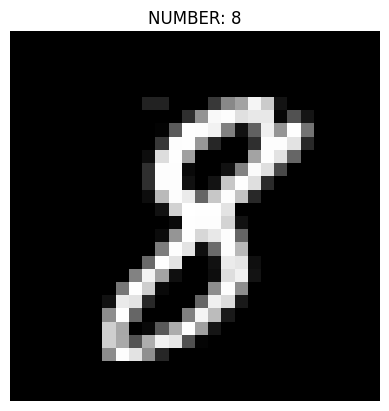

In [3]:
row_index = 20
label = train_data.iloc[row_index, 0]
pixels = train_data.iloc[row_index, 1:].values
image_matrix = pixels.reshape(28, 28)

plt.imshow(image_matrix, cmap='gray')
plt.title(f"NUMBER: {label}")
plt.axis('off')
plt.show

In [7]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1. Veriyi Hazırla (X ve y olarak ayır)
y = train_data["label"] # Cevaplar (0-9 arası rakamlar)
X = train_data.drop("label", axis=1) # Pikseller

# 2. Normalizasyon (0-1 arasına sıkıştırma)
# Pikselleri 255'e bölüyoruz
X = X / 255.0
test_data = test_data / 255.0 

# 3. Modelin İskeletini Kuruyoruz (İşte Yapay Zeka!)
model = keras.Sequential([
    # A. Giriş: Kaggle verisi zaten düz (784 sütun) olduğu için direkt alıyoruz
    layers.Input(shape=(784,)),
    
    # B. Gizli Katman (Beyin): 128 tane yapay nöron
    # activation='relu': Nöronun ateşlenmesini sağlayan matematiksel fonksiyon
    layers.Dense(128, activation='relu'),
    
    # C. Çıkış Katmanı: 0-9 arası 10 tane ihtimal
    # activation='softmax': Sonuçları yüzdeye çevirir (Toplamı %100 olur)
    layers.Dense(10, activation='softmax')
])

# 4. Modeli Derle (Compile)
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [8]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8524 - loss: 0.5359 - val_accuracy: 0.9407 - val_loss: 0.1898
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9559 - loss: 0.1485 - val_accuracy: 0.9633 - val_loss: 0.1218
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9701 - loss: 0.1018 - val_accuracy: 0.9674 - val_loss: 0.1051
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9797 - loss: 0.0706 - val_accuracy: 0.9729 - val_loss: 0.0913
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9843 - loss: 0.0526 - val_accuracy: 0.9711 - val_loss: 0.0932
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9886 - loss: 0.0417 - val_accuracy: 0.9694 - val_loss: 0.0937
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9905 - loss: 0.0337 - val_accuracy: 0.9756 - val_loss: 0.0836
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9934 - loss: 0.0239 - 

Uyarı: Veriler ham formatta (255 görüldü). Normalizasyon yapılıyor...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


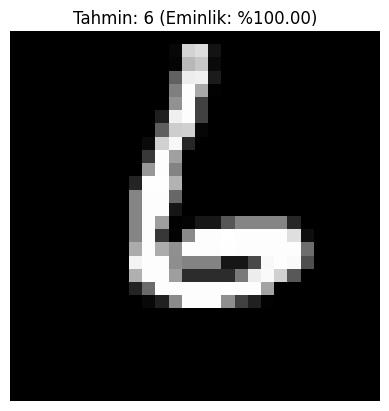

Seçilen Satır İndeksi: 13567


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. TEMİZLİK: Veriyi sıfırdan, kaynağından okuyoruz (Hafızadaki eskileri unut)
clean_test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# 2. SEÇİM: Rastgele bir resim seç
random_idx = random.randint(0, len(clean_test_data) - 1)
raw_pixels = clean_test_data.iloc[random_idx].values

# 3. KONTROL & DÜZELTME (Milyar sorununu çözen satır)
# Sayılar 1'den büyükse (yani 255 formatındaysa) 255'e böl.
if raw_pixels.max() > 1.0:
    print(f"Uyarı: Veriler ham formatta ({raw_pixels.max()} görüldü). Normalizasyon yapılıyor...")
    normalized_pixels = raw_pixels / 255.0
else:
    normalized_pixels = raw_pixels

# 4. TAHMİN
# Modeli beslemek için (1, 784) formatına getiriyoruz
input_data = normalized_pixels.reshape(1, 784)
prediction_probs = model.predict(input_data)
predicted_num = np.argmax(prediction_probs)
confidence = np.max(prediction_probs) * 100

# 5. SONUÇ EKRANI
plt.imshow(raw_pixels.reshape(28, 28), cmap='gray')
plt.title(f"Tahmin: {predicted_num} (Eminlik: %{confidence:.2f})")
plt.axis('off')
plt.show()

print(f"Seçilen Satır İndeksi: {random_idx}")

In [30]:
import pandas as pd
import numpy as np

# 1. Dosyayı sıfırdan okuyalım (Garanti olsun)
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

# 2. Normalizasyon (0-255 arasını 0-1 arasına çekiyoruz)
# Bu adımı unutursak model yine sapıtır!
X_test = test_data / 255.0

# 3. Modelin içine atıp tahminleri alalım
# (Model olasılıkları verir: [[0.1, 0.9...], [0.8, 0.2...]])
predictions_prob = model.predict(X_test)

# 4. Olasılıkların içinden en büyük olanı (kazanan rakamı) seçelim
predictions_classes = np.argmax(predictions_prob, axis=1)

# 5. Kaggle Formatına Uygun Dosyayı Oluşturalım
# Kaggle "ImageId" sütununun 1'den başlamasını ister (0'dan değil)
submission = pd.DataFrame({
    "ImageId": range(1, len(predictions_classes) + 1),
    "Label": predictions_classes
})

# 6. Kaydet
submission.to_csv("submission.csv", index=False)

print("'submission_digit.csv' başarıyla oluşturuldu!")
print("Örnek tahminler:", predictions_classes[:10]) # İlk 10 tahmini göster

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
'submission_digit.csv' başarıyla oluşturuldu!
Örnek tahminler: [2 0 9 9 3 7 0 3 0 3]
